In [1]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 124013 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.25-cp38-cp38-linux_x86_64.whl size=1820836 sha256=8de87f0aa44c5acce2b8c554aa27ea4225e492cb50eae5c9773d7

In [2]:

 !pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time
import pandas_datareader as web
import talib 
from talib import abstract
plt.style.use('ggplot')
from datetime import datetime

In [5]:
data1 = web.DataReader("2308.tw", "yahoo", start = "2011-04-22", end = "2022-10-07").round(2)
data1.columns = ("high", "low", "open", "close", "volume", "adj_close")
data1
data1.to_csv('data1.csv')

In [6]:
a= abstract.STOCH(data1)
a.to_csv('KD.csv')
a

,slowk,slowd
Date,,
2011-04-22,NaN,NaN
2011-04-25,NaN,NaN
2011-04-26,NaN,NaN
2011-04-27,NaN,NaN
2011-04-28,NaN,NaN
...,...,...
2022-10-03,31.731602,21.408369
2022-10-04,51.136364,33.755411
2022-10-05,68.981481,50.616482


In [7]:
data = web.DataReader("2308.tw", "yahoo", start = "2020-01-01", end = "2022-9-30").round(2)
data.columns = ("high", "low", "open", "close", "volume", "adj_close")
data

,high,low,open,close,volume,adj_close
Date,,,,,,
2020-01-02,152.5,150.5,152.5,151.0,2721085.0,140.57
2020-01-03,152.5,149.0,152.0,151.5,6932546.0,141.04
2020-01-06,151.0,147.5,150.0,149.0,6311505.0,138.71
2020-01-07,151.0,146.5,148.0,149.0,7947026.0,138.71
2020-01-08,149.0,147.0,148.5,148.0,5376586.0,137.78
...,...,...,...,...,...,...
2022-09-26,266.0,258.5,262.0,260.5,5848435.0,260.50
2022-09-27,263.5,259.0,259.5,262.0,4950709.0,262.00
2022-09-28,264.0,252.0,262.0,252.0,6943098.0,252.00


In [8]:
data['close'].index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=670, freq=None)

In [9]:
trainData = data[(data.index >= '2020-9-30 00:00:00')].copy()  #樣本內

In [10]:
fund=10000
money=10000
feerate=0.001425
tax=0.003
length = 100
K = 0.06


trainData['MA'] = trainData['close'].rolling(window= length, center=False).mean()
trainData["rsi_12"] = abstract.RSI(trainData, timeperiod = 12)
trainData["rsi_6"] = abstract.RSI(trainData, timeperiod = 6)

trainData

,high,low,open,close,volume,adj_close,MA,rsi_12,rsi_6
Date,,,,,,,,,
2020-09-30,189.5,185.5,187.5,189.0,5363374.0,181.30,NaN,NaN,NaN
2020-10-05,192.0,188.0,189.0,189.5,8077771.0,181.78,NaN,NaN,NaN
2020-10-06,191.5,188.5,190.5,191.5,5266598.0,183.70,NaN,NaN,NaN
2020-10-07,192.0,189.0,192.0,191.0,5769108.0,183.22,NaN,NaN,NaN
2020-10-08,193.0,190.5,193.0,193.0,5057573.0,185.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-26,266.0,258.5,262.0,260.5,5848435.0,260.50,246.015,43.402907,34.800327
2022-09-27,263.5,259.0,259.5,262.0,4950709.0,262.00,246.295,45.660262,39.668637
2022-09-28,264.0,252.0,262.0,252.0,6943098.0,252.00,246.515,35.393627,24.834160


In [11]:
df = trainData 

                 profit    profitfee
Date                                
2020-09-30     0.000000     0.000000
2020-10-05     0.000000     0.000000
2020-10-06     0.000000     0.000000
2020-10-07     0.000000     0.000000
2020-10-08     0.000000     0.000000
...                 ...          ...
2022-09-26  5369.479561  3072.160140
2022-09-27  5273.140448  2975.821026
2022-09-28  5369.479561  3072.160140
2022-09-29  5061.194398  2763.874976
2022-09-30  4714.373588  2360.230468

[489 rows x 2 columns]


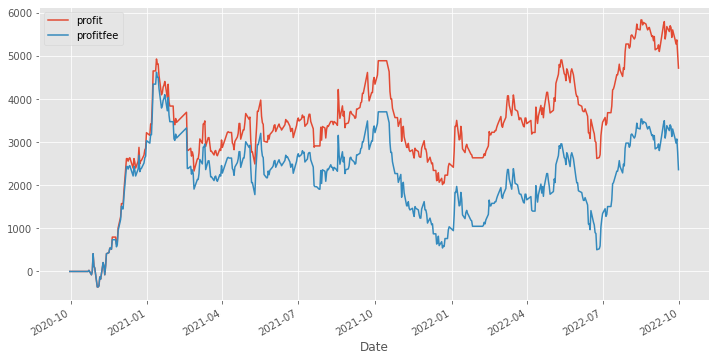

In [12]:
BS = None
buy = []
sell = []
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []
profit_fee_list_short_realized=[]

for i in range(len(df)):

    if i == len(df)-1:
        break

    ## 進場邏輯
    entryLong = df["rsi_12"][i] >= 50 and df['rsi_6'][i] >= df["rsi_12"][i] 
    entrySellShort = df["rsi_12"][i]  <= 50  and df['rsi_6'][i] <= df["rsi_12"][i] 
    
    ## 出場邏輯
    exitShort = df["rsi_12"][i]  < 50 and df['close'][i] < df["MA"][i]
    exitBuyToCover = df["rsi_12"][i]  > 50 and df['close'][i] > df["MA"][i]

    ## 停利停損邏輯
    if BS == "B":
      stopLoss = df['close'][i] <= df['open'][t] * (1-K)
      stopProfit = df['close'][i] >= df['open'][t] * (1+K)
    elif BS == 'S':
      stopLoss = df['close'][i] >= df['open'][t] * (1+K)
      stopProfit = df['close'][i] <= df['open'][t] * (1-K)

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        
        if entryLong:
            tempSize=money/df['open'][i+1]
            BS = 'B'
            t = i+1
            buy.append(t)

        elif entrySellShort:
            tempSize=money/df['open'][i+1]
            BS = 'S'
            t = i+1
            sellshort.append(t)

        
    elif BS == 'B':
        profit=tempSize*(df['open'][i+1]-df['open'][i])
        profit_list.append(profit)
            
        if exitShort or i == len(df)-2 or stopLoss or stopProfit:
            pl_round=tempSize*(df['open'][i+1]-df['open'][t])
            profit_fee=profit-2*money*feerate-(money+pl_round)*tax
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round-2*money*feerate-(money+pl_round)*tax
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            
    elif BS == 'S': 
        profit=tempSize*(df['open'][i]-df['open'][i+1])
        profit_list.append(profit)
        
        if exitBuyToCover or i == len(df)-2 or stopLoss or stopProfit:
            pl_round = tempSize * (df['open'][t] - df['open'][i + 1])
            profit_fee = profit - 2*money * feerate - (money + pl_round) * tax
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS=None

            # Realized PnL
            profit_fee_realized = pl_round-2*money*feerate-(money+pl_round)*tax
            profit_fee_list_realized.append(profit_fee_realized)
            profit_fee_list_short_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
print(equity)
equity.plot(grid=True, figsize=(12, 6));

In [13]:
print(sellshort)

[84, 98, 103, 141, 146, 195, 197, 208, 235, 252, 259, 281, 325, 333, 347, 367, 378, 390, 412]


In [14]:
profit_fee_list_short_realized

[-1084.2942238267149,
 748.0232358003442,
 -686.2407407407408,
 879.4442508710802,
 -767.9756554307116,
 -58.5,
 506.46666666666675,
 590.5415913200724,
 696.509708737864,
 -941.9177215189873,
 -747.4837398373983,
 -364.0938697318008,
 473.9677716390423,
 842.6346153846154,
 -572.8253968253969,
 870.2642585551331,
 689.25,
 -902.6418764302059,
 404.70796460176996]

In [15]:
short_data=pd.DataFrame({
    'sellshort':sellshort,
    'short_realized':profit_fee_list_short_realized

})
short_data

,sellshort,short_realized
0,84,-1084.294224
1,98,748.023236
2,103,-686.240741
3,141,879.444251
4,146,-767.975655
5,195,-58.500000
6,197,506.466667
7,208,590.541591
8,235,696.509709
9,252,-941.917722


In [16]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

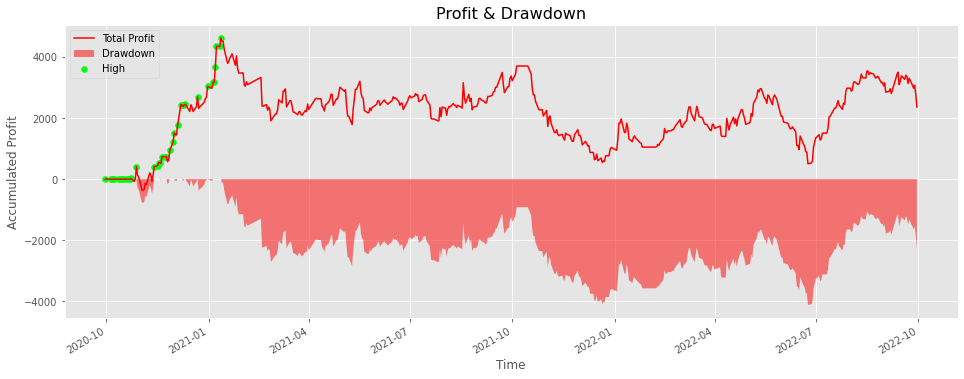

In [17]:
fig, ax = plt.subplots(figsize = (16,6))

high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
equity['profitfee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profitfee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

In [18]:
df['close'].iloc[buy].index

DatetimeIndex(['2020-10-22', '2020-11-23', '2020-12-03', '2020-12-08',
               '2021-01-06', '2021-01-11', '2021-02-19', '2021-03-19',
               '2021-04-22', '2021-05-25', '2021-07-15', '2021-10-21',
               '2021-11-09', '2021-12-13', '2022-01-06', '2022-03-25',
               '2022-06-01', '2022-06-09', '2022-07-11', '2022-07-19',
               '2022-08-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

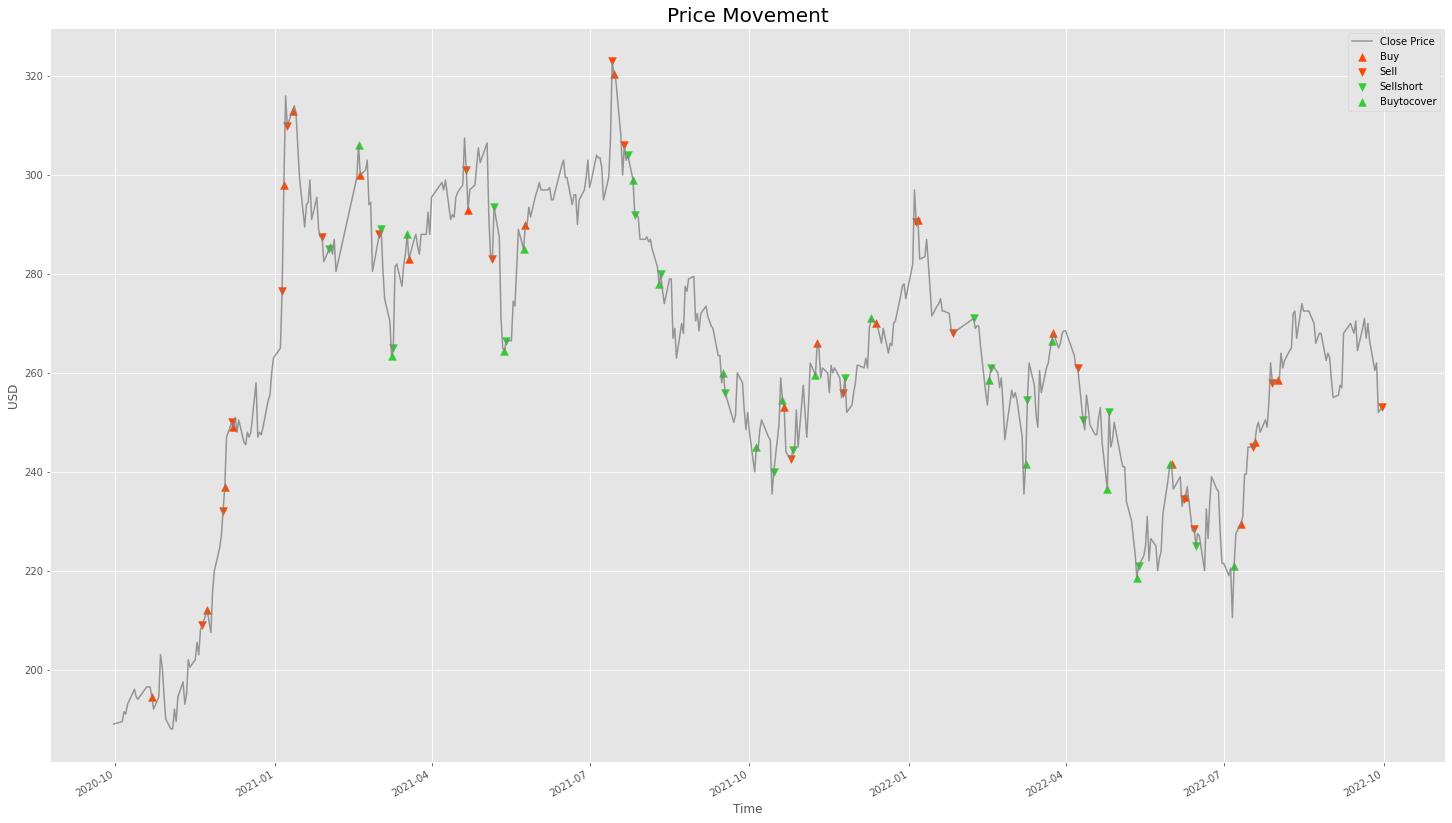

In [19]:
fig, ax = plt.subplots(figsize = (25,15))

df['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(df['close'].iloc[buy].index, df['close'].iloc[buy],c = 'orangered', label = 'Buy', marker='^', s=60)
plt.scatter(df['close'].iloc[sell].index, df['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
plt.scatter(df['close'].iloc[sellshort].index, df['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
plt.scatter(df['close'].iloc[buytocover].index, df['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 20);

In [20]:
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy)+len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i > 0]) / abs(sum([i for i in profit_fee_list_realized if i < 0]))
winLossRatio = np.mean([i for i in profit_fee_list_realized if i > 0]) / abs(np.mean([i for i in profit_fee_list_realized if i < 0]))

print(f'profit: ${np.round(profit,2)}')
print(f'return: {np.round(ret,4)*100}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'calmarRatio: {np.round(calmarRatio,2)}')
print(f'tradeTimes: {tradeTimes}')
print(f'winRate: {np.round(winRate,4)*100}%')
print(f'profitFactor: {np.round(profitFactor,2)}')
print(f'winLossRatio: {np.round(winLossRatio,2)}')

profit: $2360.23
return: 23.599999999999998%
mdd: 28.16%
calmarRatio: 0.84
tradeTimes: 40
winRate: 50.0%
profitFactor: 1.19
winLossRatio: 1.19
